## The dataset for this Kaggle project

https://www.kaggle.com/alxmamaev/flowers-recognition

In [1]:
import os
os.chdir('/users/dipit/Documents/MLDL/CNN/flowers')
PATH = os.getcwd()

In [2]:
PATH

'/Users/dipit/Documents/MLDL/CNN/flowers'

In [3]:
DATA_PATH = os.path.join(PATH,'flowers')
data_dir_list = os.listdir(DATA_PATH)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

In [5]:
data_dir_list = np.sort(data_dir_list)

In [6]:
data_dir_list = data_dir_list[1:6]

In [7]:
print(data_dir_list)

['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [8]:
img_rows = 224
img_cols = 224
num_channel = 3

batch_size = 100

img_data_list = []
classes_names_list = []

In [9]:
from tqdm import tqdm
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print('Loading images from {} folder\n'.format(dataset))
    img_list = os.listdir(DATA_PATH + '/' + dataset)
    for img in tqdm(img_list):
        index = img.rfind(".")
        ext = img[index+1:]
        if ext in ['jpg','png','gif','jpeg','jpe']:
            input_img = cv2.imread(DATA_PATH + '/' + dataset + '/' + img)
            input_img_resize = cv2.resize(input_img,(img_rows,img_cols))
            img_data_list.append(input_img_resize)

  2%|▏         | 14/769 [00:00<00:05, 137.41it/s]

Loading images from daisy folder



  1%|▏         | 14/1053 [00:00<00:07, 137.81it/s]

Loading images from dandelion folder



  2%|▏         | 16/784 [00:00<00:05, 151.48it/s]

Loading images from rose folder



  2%|▏         | 13/734 [00:00<00:05, 125.23it/s]

Loading images from sunflower folder



  2%|▏         | 15/984 [00:00<00:06, 144.24it/s]

Loading images from tulip folder



100%|██████████| 984/984 [00:08<00:00, 119.31it/s]


In [10]:
class_map = {"daisy":'Daisy',
            "dandelion":"Dandelion",
            "rose":"Rose",
            "sunflower":"Sunflower",
            "tulip":"Tulip"}

In [11]:
classes = np.sort(os.listdir(DATA_PATH))
classes = classes[1:6]
print(classes)

['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


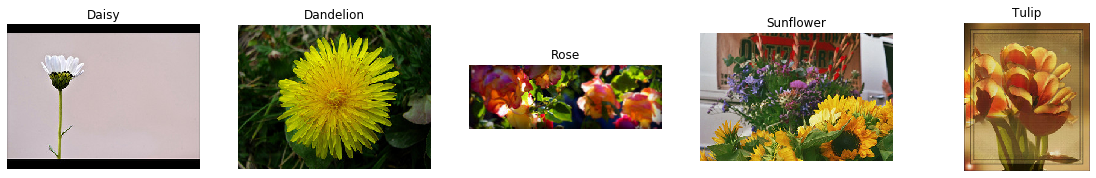

In [12]:
import matplotlib.image as mpimg
plt.figure(figsize=(20,6))
for ix,i in enumerate(classes):
    f = os.listdir(os.path.join(DATA_PATH,i))[2]
    img = mpimg.imread(os.path.join(DATA_PATH,i,f))
    plt.subplot(2,5,ix+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(class_map[i])

In [13]:
num_classes = len(classes_names_list)
print(num_classes)

5


In [14]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data/= 255

In [15]:
print(img_data.shape)

(4323, 224, 224, 3)


In [16]:
img_data = img_data.reshape(img_data.shape[0],img_data.shape[1],img_data.shape[2],num_channel)
print(img_data.shape)

(4323, 224, 224, 3)


In [17]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

In [18]:
print(num_of_samples,input_shape)

4323 (224, 224, 3)


In [19]:
classes = np.ones((num_of_samples),dtype ='int64')
classes[0:769] = 0
classes[769:1822] = 1
classes[1822:2606] = 2
classes[2606:3340] =3
classes[3340:] = 4

In [20]:
from keras.utils import to_categorical
classes = to_categorical(classes,num_classes)

Using TensorFlow backend.


In [21]:
from sklearn.utils import shuffle
X,Y = shuffle(img_data,classes,random_state = 42)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [23]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3458, 224, 224, 3) (865, 224, 224, 3) (3458, 5) (865, 5)


In [24]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.models import Model

In [25]:
from keras.layers import Input,Dense
image_input = Input(shape=(img_rows,img_cols,num_channel))

In [26]:
model = VGG16(input_tensor = image_input,include_top = True,
             weights = 'imagenet')

In [27]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [28]:
last_layer = model.get_layer('fc2').output
out = Dense(num_classes,activation = 'softmax',name = 'output')(last_layer)

In [29]:
custom_vgg_model = Model(image_input,out)
custom_vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [30]:
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

In [31]:
import keras
optimizer = keras.optimizers.Adam(lr = 0.001)
custom_vgg_model.compile(loss = "categorical_crossentropy",
                        optimizer = optimizer,
                        metrics = ['accuracy'])

In [32]:
custom_vgg_model.fit(X_train,y_train,batch_size = batch_size,epochs = 20,
                    verbose = 1,validation_data = (X_test,y_test))

Train on 3458 samples, validate on 865 samples
Epoch 1/20
3458/3458 [==============================] - 2968s 858ms/step - loss: 1.4125 - accuracy: 0.4176 - val_loss: 1.0769 - val_accuracy: 0.6092
Epoch 2/20
3458/3458 [==============================] - 1173s 339ms/step - loss: 0.9768 - accuracy: 0.6553 - val_loss: 0.8854 - val_accuracy: 0.6936
Epoch 3/20
3458/3458 [==============================] - 1157s 334ms/step - loss: 0.8429 - accuracy: 0.7047 - val_loss: 0.8169 - val_accuracy: 0.6983
Epoch 4/20
3458/3458 [==============================] - 1160s 335ms/step - loss: 0.7746 - accuracy: 0.7308 - val_loss: 0.7295 - val_accuracy: 0.7468
Epoch 5/20
3458/3458 [==============================] - 1895s 548ms/step - loss: 0.7243 - accuracy: 0.7458 - val_loss: 0.7180 - val_accuracy: 0.7214
Epoch 6/20
3458/3458 [==============================] - 1148s 332ms/step - loss: 0.7042 - accuracy: 0.7519 - val_loss: 0.7136 - val_accuracy: 0.7503
Epoch 7/20
3458/3458 [==============================] - 116

In [33]:
score = custom_vgg_model.evaluate(X_test,y_test,batch_size=batch_size)
print("Test loss:",score[0])
print("Test Accuracy:",score[1])

865/865 [==============================] - 254s 294ms/step
Test loss: 0.5416703048469014
Test Accuracy: 0.8161849975585938


In [34]:
pred = custom_vgg_model.predict(X_test)
pred_digits = np.argmax(pred,axis=1)

In [35]:
pred_digits

array([2, 1, 3, 2, 1, 4, 1, 2, 3, 3, 0, 0, 1, 3, 1, 2, 4, 2, 3, 1, 1, 3,
       1, 4, 4, 3, 0, 2, 1, 1, 0, 0, 1, 0, 4, 2, 2, 1, 0, 1, 0, 2, 0, 1,
       1, 1, 2, 4, 4, 3, 0, 2, 4, 2, 1, 4, 0, 3, 0, 2, 1, 3, 4, 2, 4, 3,
       1, 1, 1, 4, 2, 4, 1, 1, 4, 3, 0, 3, 4, 0, 1, 4, 2, 4, 4, 1, 2, 2,
       1, 4, 4, 4, 1, 2, 2, 3, 4, 1, 3, 3, 1, 2, 3, 2, 2, 3, 4, 2, 1, 1,
       1, 1, 0, 3, 0, 2, 0, 2, 1, 3, 4, 4, 2, 4, 3, 3, 0, 1, 4, 3, 3, 0,
       1, 2, 1, 0, 4, 0, 2, 3, 0, 1, 2, 1, 0, 3, 1, 2, 1, 2, 0, 4, 2, 1,
       4, 0, 1, 0, 1, 1, 1, 2, 1, 4, 3, 2, 1, 3, 2, 4, 2, 3, 0, 1, 1, 4,
       2, 0, 3, 3, 4, 3, 4, 2, 3, 2, 2, 2, 1, 3, 0, 0, 3, 3, 3, 0, 0, 4,
       2, 2, 3, 1, 2, 2, 2, 2, 1, 4, 1, 0, 4, 1, 0, 1, 0, 3, 1, 1, 0, 1,
       1, 4, 3, 0, 3, 4, 1, 2, 0, 3, 3, 3, 1, 4, 0, 2, 2, 3, 4, 0, 4, 1,
       3, 0, 2, 1, 2, 0, 1, 1, 2, 4, 3, 1, 4, 1, 4, 4, 2, 0, 3, 3, 4, 3,
       0, 3, 3, 4, 0, 2, 4, 2, 4, 1, 1, 3, 0, 1, 4, 1, 3, 1, 4, 2, 0, 3,
       4, 2, 0, 3, 1, 3, 4, 4, 1, 1, 0, 1, 2, 2, 3,

In [36]:
i = 0
correct = []
incorrect = []

for i in range(0,len(y_test)):
    if(np.argmax(y_test[i]) == pred_digits[i]):
        correct.append(i)
    if(len(correct) == 10):
        break
        
        
i = 0

for i in range(0,len(y_test)):
    if(not np.argmax(y_test[i]) == pred_digits[i]):
        incorrect.append(i)
    if(len(incorrect) == 10):
        break

## Correctly Classified Images

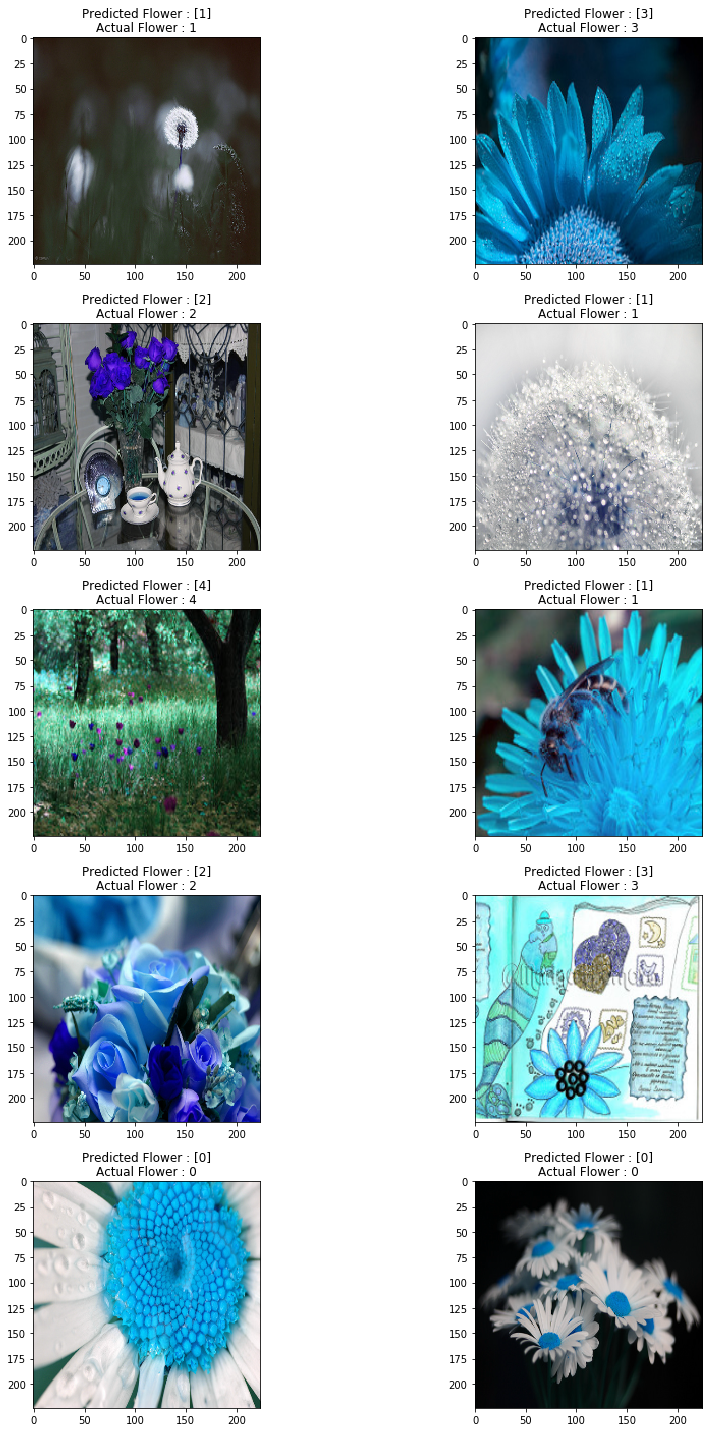

In [37]:
count = 0
fig,ax = plt.subplots(5,2)
fig.set_size_inches(20,20)
for i in range(5):
    for j in range(2):
        ax[i,j].imshow(X_test[correct[count]])
        ax[i,j].set_title("Predicted Flower : " + str(([pred_digits[correct[count]]]))+ "\n" +
                         "Actual Flower : "+str((np.argmax([y_test[correct[count]]]))))
        plt.tight_layout()
        count+=1

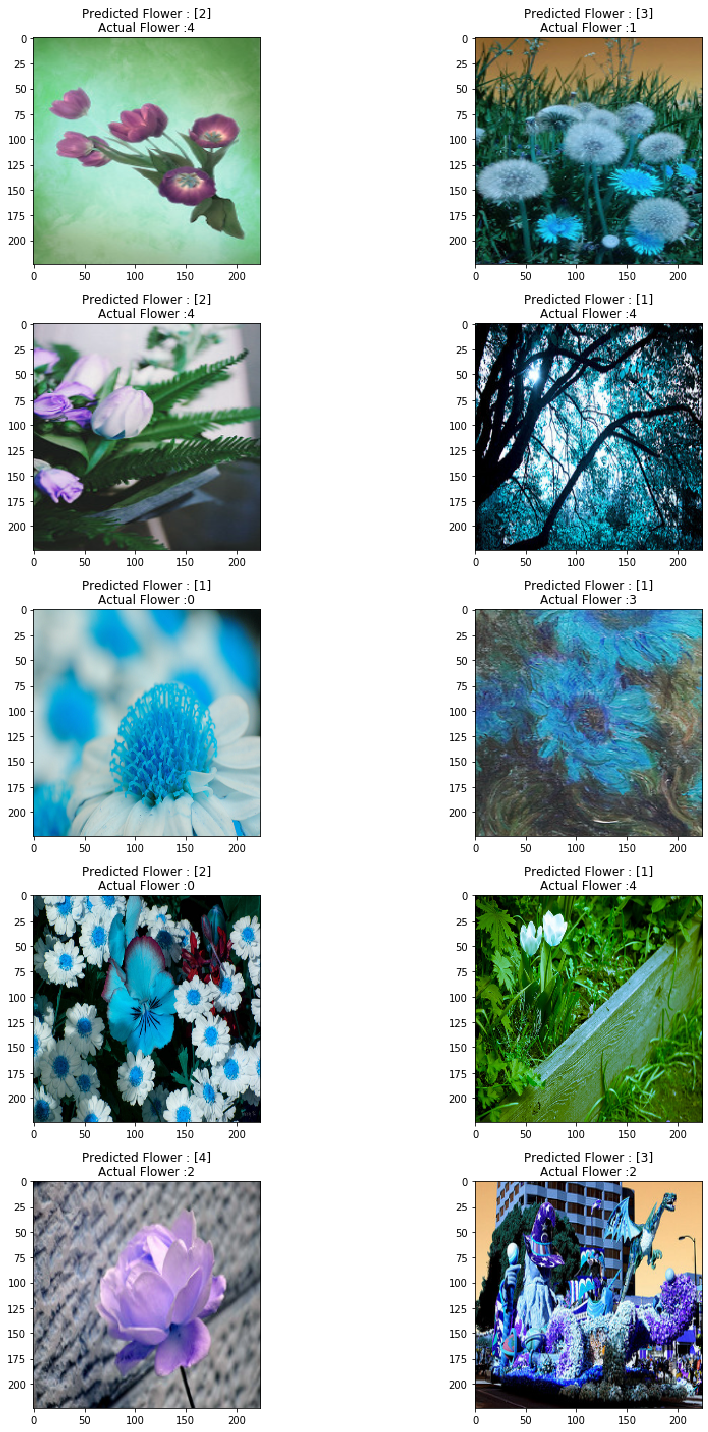

In [38]:
count = 0
fig,ax = plt.subplots(5,2)
fig.set_size_inches(20,20)
for i in range(5):
    for j in range(2):
        ax[i,j].imshow(X_test[incorrect[count]])
        ax[i,j].set_title("Predicted Flower : " + str(([pred_digits[incorrect[count]]]))+ "\n" +"Actual Flower :"+ str((np.argmax([y_test[incorrect[count]]]))))
        plt.tight_layout()
        count+=1